In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/cancer_classification.csv')

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


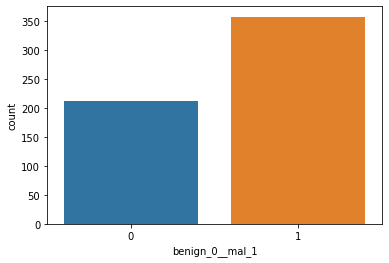

In [4]:
sns.countplot(x='benign_0__mal_1',data=df)

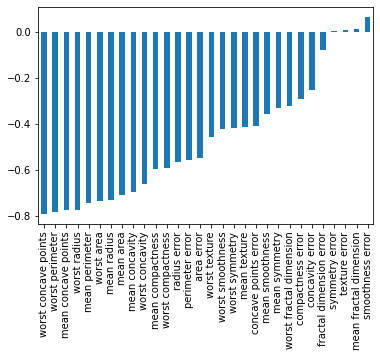

In [5]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

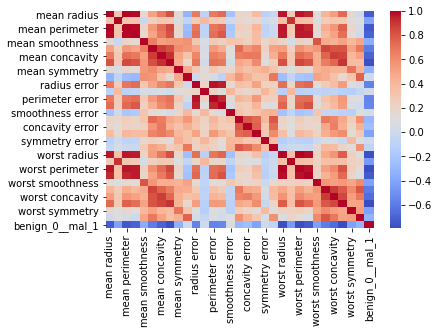

In [6]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [7]:
X = df.drop('benign_0__mal_1',axis=1).values

In [8]:
y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[0.26317335, 0.29861346, 0.2461044 , ..., 0.29010309, 0.27951902,
        0.11025843],
       [0.34536915, 0.21203923, 0.32136119, ..., 0.25611684, 0.22866154,
        0.11347239],
       [0.29008269, 0.22387555, 0.27070086, ..., 0.28298969, 0.28760103,
        0.09477896],
       ...,
       [0.51954597, 0.46060196, 0.52553979, ..., 0.68591065, 0.14508181,
        0.44182081],
       [0.22696805, 0.28643896, 0.22772692, ..., 0.48659794, 0.21584861,
        0.24701561],
       [0.41680121, 0.38451133, 0.41303892, ..., 0.73333333, 0.28346146,
        0.32638069]])

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
from tensorflow.keras.layers import Dense

In [16]:
X_train.shape

(426, 30)

In [17]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [18]:
model.fit(x=X_train,y=y_train,epochs=800,validation_data=(X_test,y_test))

Epoch 1/800
14/14 [==============================] - 0s 13ms/step - loss: 25.3502 - val_loss: 0.3005
Epoch 2/800
14/14 [==============================] - 0s 3ms/step - loss: 2.0750 - val_loss: 0.8285
Epoch 3/800
14/14 [==============================] - 0s 3ms/step - loss: 0.7010 - val_loss: 0.9716
Epoch 4/800
14/14 [==============================] - 0s 3ms/step - loss: 0.4071 - val_loss: 0.3593
Epoch 5/800
14/14 [==============================] - 0s 3ms/step - loss: 0.2732 - val_loss: 0.3300
Epoch 6/800
14/14 [==============================] - 0s 3ms/step - loss: 0.2393 - val_loss: 0.2925
Epoch 7/800
14/14 [==============================] - 0s 3ms/step - loss: 0.2369 - val_loss: 0.2615
Epoch 8/800
14/14 [==============================] - 0s 3ms/step - loss: 0.2284 - val_loss: 0.3306
Epoch 9/800
14/14 [==============================] - 0s 3ms/step - loss: 0.2709 - val_loss: 0.3035
Epoch 10/800
14/14 [==============================] - 0s 3ms/step - loss: 0.2344 - val_loss: 0.2356
Epoch 1

In [19]:
losses = pd.DataFrame(model.history.history)

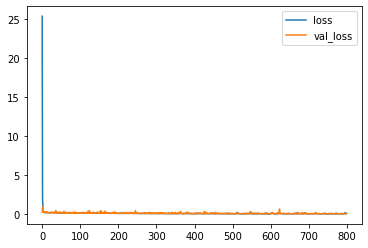

In [20]:
losses.plot()

In [23]:
predictions = model.predict_classes(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        55
           1       0.99      0.93      0.96        88

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143



In [26]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 6 82]]
